# IS460 Machine Learning & Applications - Data Preprocessing

## <i>Unravelling the Shift in Air Travel Preferences 🛫</i>

<u>Class Group No.:</u> G1<br>
<u>Student Group No.:</u> 5<br>
<u>Team Member Details:</u>
<table align='left'>
    <tr>
        <td><strong>Full Name</strong></td>
        <td><strong>Matriculation No.</strong></td>
    </tr>
    <tr>
        <td>Goh Nina Melda</td>
        <td>01445491</td>
    </tr>
    <tr>
        <td>Laetitia Hong Jae-ee</td>
        <td>01440359</td>
    </tr>
    <tr>
        <td>Leong Chong Gui</td>
        <td>01520030</td>
    </tr>
    <tr>
        <td>Ng Wei Lun Andrew</td>
        <td>01397857</td>
    </tr>
    <tr>
        <td>Sze Xin Wei</td>
        <td>01394966</td>
    </tr>
</table>

# Table of Contents
<table align='left'>
    <tr>
        <td><strong>No.</strong></td>
        <td><strong>Section Title</strong></td>
    </tr>
    <tr>
        <td align='center'>1</td>
        <td><a href='#1. Dataset Overview'>Dataset Overview</a></td>
    </tr>
    <tr>
        <td align='center'>2</td>
        <td><a href='#2. Customer Reviews Overview'>Customer Reviews Overview</a></td>
    </tr>
    <tr>
        <td align='center'>3</td>
        <td><a href='#3.Customer-Review-Analysis-using-LLMs-BERT'>Customer Review Analysis using LLMs - BERT</a></td>
    </tr>
    <tr>
        <td align='center'>4</td>
        <td><a href='#2.-Support-Vector-Machine'>Predicting Reccomendations using BERT Embeddings</a></td>
    </tr>
</table>

# 1. Dataset Overview

The table below summarises the properties of the attributes of our data source (not in chronological order).<br><br>
<i><u>Source:</u> Vyshnia, G. (2023). Kaggle. <a href='https://www.kaggle.com/code/gvyshnya/airline-reviews-sentiments-ts-and-eda/input'>Link to dataset.</a></i>
<hr>

<table align='left' style='word-wrap: break-word'>
    <tr>
        <td><strong>Category</strong></td>
        <td><strong>Name</strong></td>
        <td><strong>Data Type</strong></td>
        <td><strong>Description</strong></td>
    </tr>
    <tr>
        <td rowspan='11'>Qualitative descriptive data</td>
        <td>Serial Number</td>
        <td>Integer</td>
        <td>Indication of row indices.</td>
    </tr>
    <tr>
        <td>Airline Name</td>
        <td>String</td>
        <td>Name of airline being reviewed.</td>
    </tr>
    <tr>
        <td>Review_Title</td>
        <td>String</td>
        <td>Title of user-generated review.</td>
    </tr>
    <tr>
        <td>Review Date</td>
        <td>String</td>
        <td>Date of review submission, with format DD% Month YYYY.</td>
    </tr>
    <tr>
        <td>Verified</td>
        <td>Boolean</td>
        <td>Binary indication of whether the reviewer is verified (represented as 'True'), or not (represented as 'False').</td>
    </tr>
    <tr>
        <td>Review</td>
        <td>String</td>
        <td>Detailed user-generated review of airline experience.</td>
    </tr>
    <tr>
        <td>Aircraft</td>
        <td>String</td>
        <td>Model of aircraft boarded by user.</td>
    </tr>
    <tr>
        <td>Type of Traveller</td>
        <td>String</td>
        <td>Categorical indication of purpose of travel, designated by the following unique values:
            <li>Business</li>
            <li>Couple Leisure</li>
            <li>Family Leisure</li>
            <li>Solo Leisure</li>
        </td>
    </tr>
    <tr>
        <td>Seat Type</td>
        <td>String</td>
        <td>Categorical indication of class of seating, designated by the following unique values:
            <li>First Class</li>
            <li>Business Class</li>
            <li>Premium Economy</li>
            <li>Economy Class</li>
        </td>
    </tr>
    <tr>
        <td>Route</td>
        <td>String</td>
        <td>Specific flight route, with the following format: [Departure Destination] to [Arrival Destination].</td>
    </tr>
    <tr>
        <td>Date Flown</td>
        <td>String</td>
        <td>Month and Year of flight.</td>
    </tr>
    <tr>
        <td rowspan='9'>Quantitative descriptive data</td>
        <td>Overall_Rating</td>
        <td>Integer</td>
        <td>Ordinal rating given by user, with values between the range of 1-10.</td>
    </tr>
    <tr>  
        <td>Seat Comfort</td>
        <td>Float</td>
        <td rowspan='7'>Ordinal rating ranging from 1.0 to 5.0.</td>
    </tr>
    <tr>
        <td>Cabin Staff Service</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Food & Beverages</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Ground Service</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Inflight Entertainment</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Wifi & Connectivity</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Value For Money</td>
        <td>Float</td>
    </tr>
    <tr>
        <td>Recommended</td>
        <td>String</td>
        <td>Binary indication of whether the user recommends the airline (represented as 'yes') or not (represented as 'no').</td>
    </tr>
</table>

<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i>

In [ ]:
# Install necessary packages
!pip install spacy transformers scikit-learn matplotlib datasets torch
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.loa

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


# 2. Customer Reviews Overview
<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i>

In [13]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification, pipeline, AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

file_path = '/content/drive/MyDrive/final_combined_data.xlsx'

# Load the dataset
df = pd.read_excel(file_path)

# Step 1: Data Preprocessing
# Clean text data: lowercase, remove special characters
df['Review_clean'] = df['Review'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Drop rows with missing values in key columns
df = df.dropna(subset=['Review', 'Overall_Rating'])

# Convert 'Date Flown' column to datetime format
df['Date Flown'] = pd.to_datetime(df['Date Flown'], errors='coerce')

# Ensure that we have valid periods for analysis
print(df[['Date Flown', 'Period']].head())

  Date Flown Period
0 2019-11-01    Pre
1 2019-06-01    Pre
2 2019-06-01    Pre
3 2019-09-01    Pre
4 2019-09-01    Pre


Average ratings for each aspect by period:
        Seat Comfort  Cabin Staff Service  Food & Beverages  Ground Service  \
Period                                                                        
Post        2.383436             2.601322          2.233404        2.068589   
Pre         2.793690             3.050317          2.844710        2.573422   

        Inflight Entertainment  Wifi & Connectivity  Value For Money  
Period                                                                
Post                  1.614636             1.291066         2.113305  
Pre                   2.182266             1.170068         2.697279  


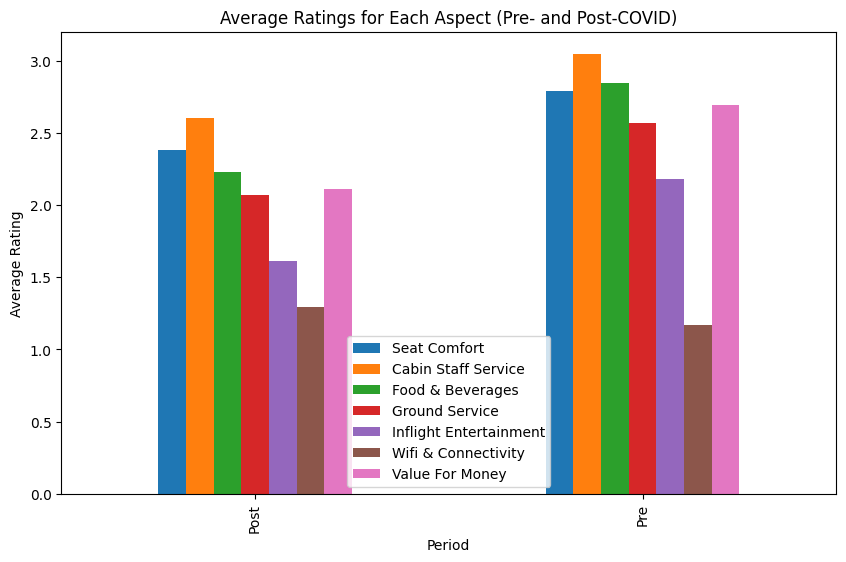

In [14]:
# Step 3: Aspect Ratings Analysis by Period
aspect_columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                  'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']

# Calculate and visualize average ratings for each aspect by period
average_ratings_by_period = df.groupby('Period')[aspect_columns].mean()
print("Average ratings for each aspect by period:")
print(average_ratings_by_period)

# Visualize the difference in ratings between pre- and post-COVID
average_ratings_by_period.plot(kind='bar', figsize=(10,6), title="Average Ratings for Each Aspect (Pre- and Post-COVID)")
plt.ylabel('Average Rating')
plt.show()

<ipython-input-15-5bbddf60519c>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pre_covid_sentiment['Aspect'], rotation=45, ha='right')
<ipython-input-15-5bbddf60519c>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(post_covid_sentiment['Aspect'], rotation=45, ha='right')


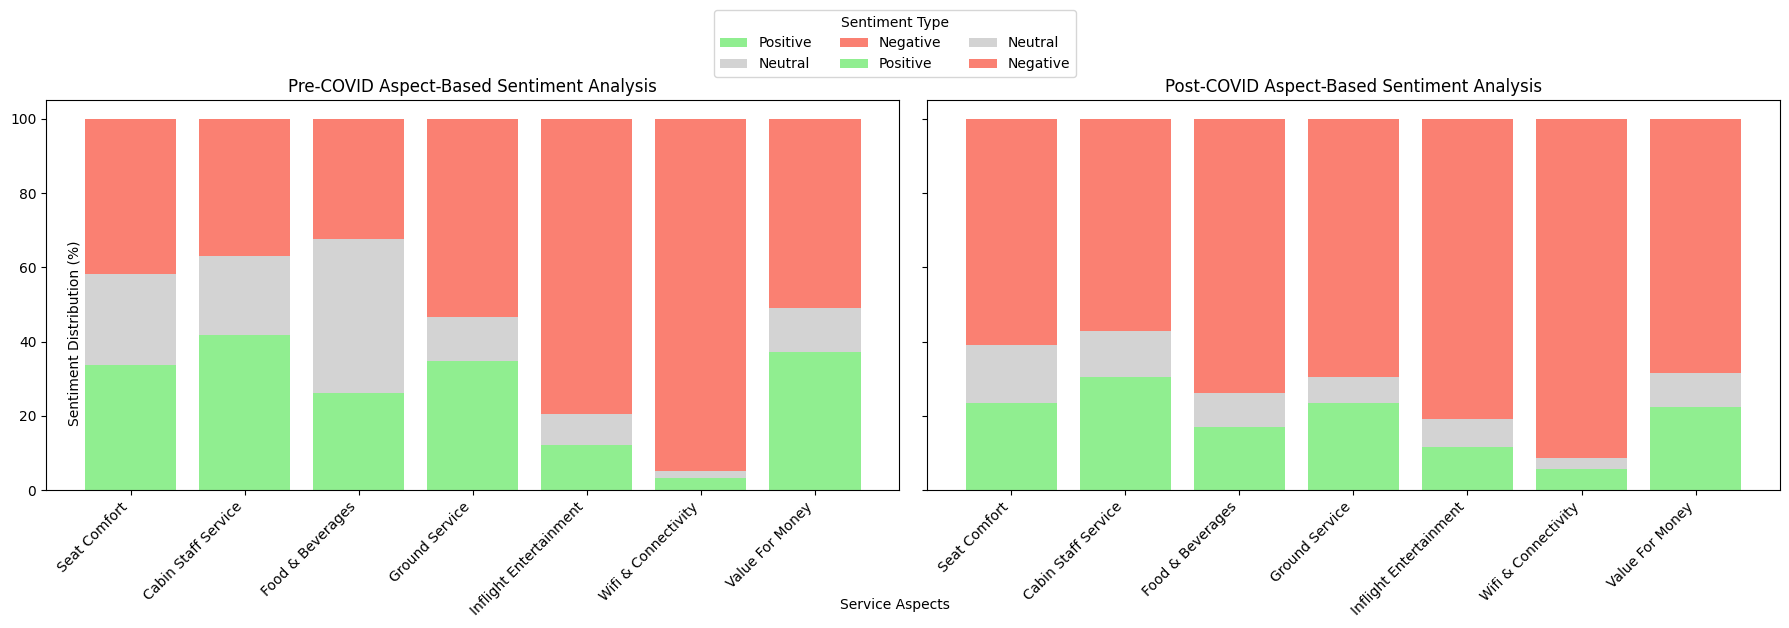

In [15]:
def classify_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating >= 4:
        return 'Positive'

def calculate_sentiment_distribution(df):
    sentiment_distribution = {'Aspect': [], 'Positive': [], 'Neutral': [], 'Negative': []}

    for aspect in aspect_columns:
        sentiment_counts = df[aspect].apply(classify_sentiment).value_counts(normalize=True) * 100
        sentiment_distribution['Aspect'].append(aspect)
        sentiment_distribution['Positive'].append(sentiment_counts.get('Positive', 0))
        sentiment_distribution['Neutral'].append(sentiment_counts.get('Neutral', 0))
        sentiment_distribution['Negative'].append(sentiment_counts.get('Negative', 0))

    return pd.DataFrame(sentiment_distribution)

# Split the data into Pre-COVID and Post-COVID periods
pre_covid_data = df[df['Period'] == 'Pre']
post_covid_data = df[df['Period'] == 'Post']

# Calculate sentiment distributions for each period
pre_covid_sentiment = calculate_sentiment_distribution(pre_covid_data)
post_covid_sentiment = calculate_sentiment_distribution(post_covid_data)

# Plotting the ABSA charts for Pre and Post COVID periods
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Pre-COVID Chart
ax1.bar(pre_covid_sentiment['Aspect'], pre_covid_sentiment['Positive'], label='Positive', color='lightgreen')
ax1.bar(pre_covid_sentiment['Aspect'], pre_covid_sentiment['Neutral'],
        bottom=pre_covid_sentiment['Positive'], label='Neutral', color='lightgrey')
ax1.bar(pre_covid_sentiment['Aspect'], pre_covid_sentiment['Negative'],
        bottom=(pre_covid_sentiment['Positive'] + pre_covid_sentiment['Neutral']), label='Negative', color='salmon')
ax1.set_title('Pre-COVID Aspect-Based Sentiment Analysis')
ax1.set_xticklabels(pre_covid_sentiment['Aspect'], rotation=45, ha='right')

# Post-COVID Chart
ax2.bar(post_covid_sentiment['Aspect'], post_covid_sentiment['Positive'], label='Positive', color='lightgreen')
ax2.bar(post_covid_sentiment['Aspect'], post_covid_sentiment['Neutral'],
        bottom=post_covid_sentiment['Positive'], label='Neutral', color='lightgrey')
ax2.bar(post_covid_sentiment['Aspect'], post_covid_sentiment['Negative'],
        bottom=(post_covid_sentiment['Positive'] + post_covid_sentiment['Neutral']), label='Negative', color='salmon')
ax2.set_title('Post-COVID Aspect-Based Sentiment Analysis')
ax2.set_xticklabels(post_covid_sentiment['Aspect'], rotation=45, ha='right')

# Labels and Legend
fig.text(0.5, 0.04, 'Service Aspects', ha='center')
fig.text(0.04, 0.5, 'Sentiment Distribution (%)', va='center', rotation='vertical')
fig.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05), title="Sentiment Type")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

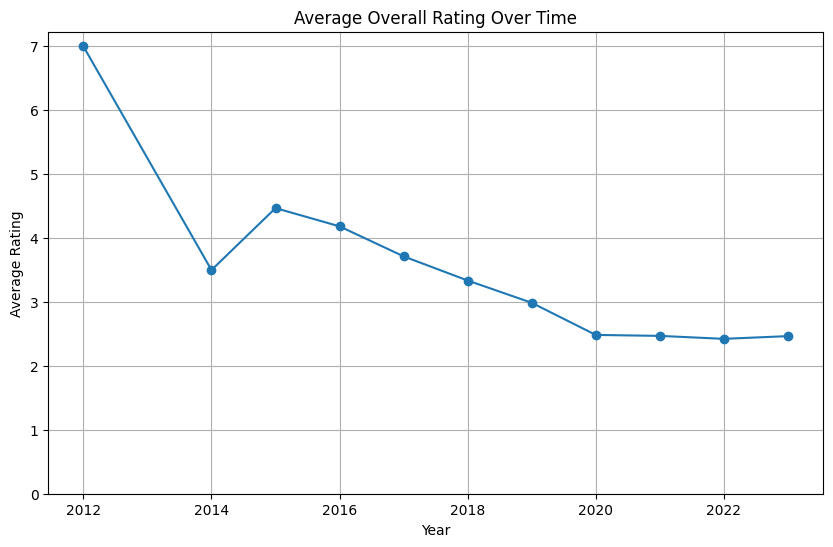

In [16]:
# Step 4: Time-Based Sentiment and Trend Analysis
# Analyze average overall rating by year
df['Year'] = df['Date Flown'].dt.year
overall_rating_by_year = df.groupby('Year')['Overall_Rating'].mean()

# Plot average overall rating over time
plt.figure(figsize=(10,6))
overall_rating_by_year.plot(kind='line', marker='o', title="Average Overall Rating Over Time")
plt.ylabel('Average Rating')
plt.xlabel('Year')
plt.ylim(0)  # Set y-axis to start from 0
plt.grid(True)
plt.show()


# 3. Customer Review Analysis using LLMs - BERT
<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i>

In [17]:
# Step 5: Load and Apply BERT Model for Sentiment Analysis
# Load a pre-trained BERT model and tokenizer for sentiment analysis
tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Create a sentiment analysis pipeline using BERT to streamline the process for efficiency
bert_sentiment_analyzer = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device = 0)

def analyze_sentiment(review):
    # Split the review into tokens
    tokens = tokenizer.tokenize(review)
    # Process in chunks if necessary
    sentiments = []
    for i in range(0, len(tokens), 512):
        chunk_tokens = tokens[i:i + 512]
        chunk_text = tokenizer.convert_tokens_to_string(chunk_tokens)
        sentiment = bert_sentiment_analyzer(chunk_text, truncation=True, max_length=512)[0]['label']
        sentiments.append(sentiment)
    return sentiments

# Apply BERT-based sentiment analysis to the reviews
# df = df.sample(10)  # Take a sample of 10 reviews
# df['Sentiment_BERT'] = df['Review_clean'].apply(analyze_sentiment)


df['Sentiment_BERT'] = df['Review_clean'].apply(analyze_sentiment)

# Map the sentiment labels to numerical values (optional)
# sentiment_map = {'POSITIVE': 1, 'NEGATIVE': 0, 'NEUTRAL': 0.5}
sentiment_map = {
    '5 stars': 5,
    '4 stars': 4,
    '3 stars': 3,
    '2 stars': 2,
    '1 star': 1  # Adjust as needed
}

# You may want to combine sentiment results if you used chunking
# This example simply keeps all sentiments; adjust as needed.
df['Sentiment_BERT_numeric'] = df['Sentiment_BERT'].apply(lambda sentiments: [sentiment_map[label] for label in sentiments])

# # Example of how to handle sentiment aggregation if needed
df['Sentiment_BERT_numeric_combined'] = df['Sentiment_BERT_numeric'].apply(lambda x: sum(x) / len(x) if x else 0)
# print(df)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Average sentiment (BERT) by period:
  Period  Sentiment_BERT_numeric_combined
0   Post                         1.780828
1    Pre                         2.239327


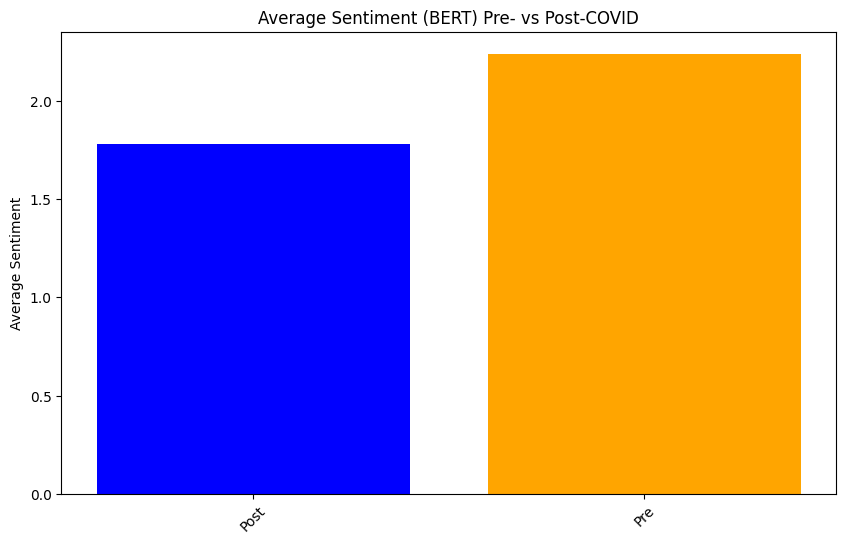

In [18]:
# Step 6: Analyze Sentiment Pre- and Post-COVID

# Compare average sentiment by period
average_sentiment_by_period = df.groupby('Period')['Sentiment_BERT_numeric_combined'].mean().reset_index()

print("Average sentiment (BERT) by period:")
print(average_sentiment_by_period)

# Visualize sentiment differences between pre- and post-COVID
plt.figure(figsize=(10, 6))
plt.bar(average_sentiment_by_period['Period'], average_sentiment_by_period['Sentiment_BERT_numeric_combined'], color=['blue', 'orange'])
plt.title("Average Sentiment (BERT) Pre- vs Post-COVID")
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.show()


In [19]:
df.head()

,Overall_Rating,Review_Title,Review,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Period,Review_clean,Year,Sentiment_BERT,Sentiment_BERT_numeric,Sentiment_BERT_numeric_combined
0,9,"""pretty decent airline""",Moroni to Moheli. Turned out to be a pretty ...,2019-11-01,4,5,4,4,2,1,3,1,Pre,moroni to moheli turned out to be a pretty d...,2019,[4 stars],[4],4.0
1,1,"""Not a good airline""",Moroni to Anjouan. It is a very small airline...,2019-06-01,2,2,1,1,2,1,2,0,Pre,moroni to anjouan it is a very small airline ...,2019,[2 stars],[2],2.0
2,1,"""flight was fortunately short""",Anjouan to Dzaoudzi. A very small airline an...,2019-06-01,2,1,1,1,2,1,2,0,Pre,anjouan to dzaoudzi a very small airline and...,2019,[2 stars],[2],2.0
3,1,"""I will never fly again with Adria""",Please do a favor yourself and do not fly wi...,2019-09-01,1,1,3,1,2,1,1,0,Pre,please do a favor yourself and do not fly wi...,2019,[1 star],[1],1.0
4,1,"""it ruined our last days of holidays""",Do not book a flight with this airline! My fr...,2019-09-01,1,1,1,1,1,1,1,0,Pre,do not book a flight with this airline my fri...,2019,[1 star],[1],1.0


In [20]:
nlp = spacy.load("en_core_web_sm")

# Initialize a separate tokenizer specifically for aspect-based sentiment analysis with specific settings
aspect_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", model_max_length=512, truncation=True)

# Initialize BERT sentiment analyzer pipeline
bert_sentiment_analyzer = pipeline("sentiment-analysis", model="bert-base-uncased",device=0)

# Function to extract aspects from review text
def extract_aspects(review):
    doc = nlp(review)
    aspects = []
    for token in doc:
        if token.pos_ in ['NOUN', 'PROPN'] and token.dep_ in ['nsubj', 'dobj']:
            aspects.append(token.text)
    return aspects

# Apply aspect extraction to the reviews
df['Extracted_Aspects'] = df['Review_clean'].apply(extract_aspects)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be abl

In [21]:
import torch


# Assuming you have a GPU, set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def bert_aspect_sentiment_analysis_batch(reviews, aspects_list, bert_analyzer, batch_size=32):
    aspect_sentiments_list = []
    for i in range(0, len(reviews), batch_size):
        batch_reviews = reviews[i : i + batch_size]
        batch_aspects = aspects_list[i : i + batch_size]

        # Use the tokenizer associated with the bert_analyzer to prepare the input
        batch_sentiments = bert_analyzer(batch_reviews, truncation=True, max_length=512)

        for j, sentiments in enumerate(batch_sentiments):
            aspect_sentiments = {}
            for aspect in batch_aspects[j]:
                if aspect in batch_reviews[j]:
                    # Access the sentiment label correctly
                    aspect_sentiments[aspect] = sentiments['label']
            aspect_sentiments_list.append(aspect_sentiments)
    return aspect_sentiments_list

# Apply the sentiment analysis in batches
df['Aspect_Sentiments_BERT'] = bert_aspect_sentiment_analysis_batch(
    df['Review_clean'].tolist(), df['Extracted_Aspects'].tolist(), bert_sentiment_analyzer
)


aspect_sentiment_by_period = df.groupby('Period')['Aspect_Sentiments_BERT'].apply(
    lambda x: pd.Series(x.explode()).value_counts(normalize=True)
)

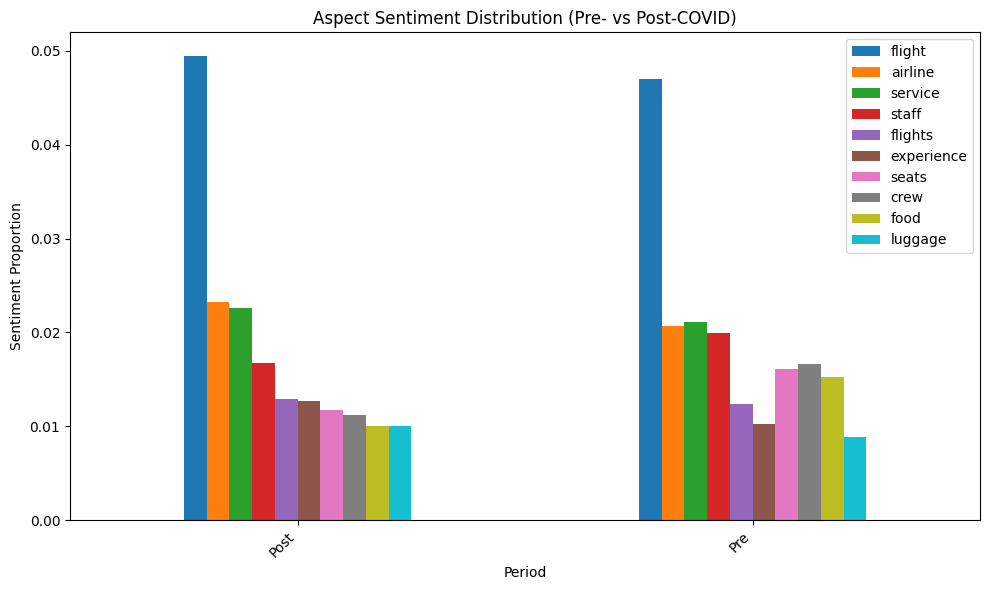

In [22]:
# Visualize aspect sentiment changes between pre- and post-COVID
# Limit the number of aspects displayed to prevent the error

# Get top aspects based on overall frequency (across both periods)
top_aspects = aspect_sentiment_by_period.index.get_level_values(1).unique()[:10] # Select top 10 unique aspects

# Select the data for the top aspects and then unstack for plotting
aspect_sentiment_by_period_top = aspect_sentiment_by_period[aspect_sentiment_by_period.index.get_level_values(1).isin(top_aspects)]
aspect_sentiment_by_period_top.unstack().plot(kind='bar', figsize=(10,6), title="Aspect Sentiment Distribution (Pre- vs Post-COVID)")


plt.ylabel('Sentiment Proportion')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# 4. Predicting Reccomendations using BERT Embeddings
<hr>
<i>Back to <a href='#Table-of-Contents'>Table of Contents</a></i>

In [23]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert 'Recommended' column to numeric
df['Recommended'] = pd.to_numeric(df['Recommended'], errors='coerce')

# Function to split data and train models
def train_models_on_period(df, period):
    # Filter the data by the specified period
    period_df = df[df['Period'] == period]

    # Separate features and labels
    X = period_df['Review_clean']
    y = period_df['Recommended']

    # Check class distribution
    print(f"Class distribution for {period}:")
    print(y.value_counts())

    # Stratified split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Initialize BERT model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    # Function to generate BERT embeddings
    def generate_bert_embeddings(text_data, batch_size=16):
        embeddings = []
        with torch.no_grad():
            for i in range(0, len(text_data), batch_size):
                batch = text_data[i:i + batch_size]
                encoded_input = tokenizer(batch.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')
                input_ids = encoded_input['input_ids'].to(device)
                attention_mask = encoded_input['attention_mask'].to(device)
                outputs = model(input_ids, attention_mask=attention_mask)
                batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
                embeddings.append(batch_embeddings)
        return np.vstack(embeddings)

    # Generate BERT embeddings
    X_train_embeddings = generate_bert_embeddings(X_train)
    X_test_embeddings = generate_bert_embeddings(X_test)

    # Train Logistic Regression
    log_reg_model = LogisticRegression()
    log_reg_model.fit(X_train_embeddings, y_train)
    y_pred_log_reg = log_reg_model.predict(X_test_embeddings)

    print(f"Logistic Regression Classification Report for {period}:")
    print(classification_report(y_test, y_pred_log_reg))

    # Train SVM
    svm_model = SVC(kernel='rbf')
    svm_model.fit(X_train_embeddings, y_train)
    y_pred_svm = svm_model.predict(X_test_embeddings)

    print(f"SVM Classification Report for {period}:")
    print(classification_report(y_test, y_pred_svm))

    return y_test, y_pred_log_reg, y_pred_svm

for period in ['Pre', 'Post']:
    y_test, y_pred_log_reg, y_pred_svm = train_models_on_period(df, period)



Class distribution for Pre:
Recommended
0    5070
1    3456
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report for Pre:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1014
           1       0.90      0.89      0.89       692

    accuracy                           0.91      1706
   macro avg       0.91      0.91      0.91      1706
weighted avg       0.91      0.91      0.91      1706

SVM Classification Report for Pre:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1014
           1       0.90      0.89      0.90       692

    accuracy                           0.92      1706
   macro avg       0.91      0.91      0.91      1706
weighted avg       0.91      0.92      0.91      1706

Class distribution for Post:
Recommended
0    8249
1    2642
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report for Post:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1650
           1       0.88      0.85      0.87       529

    accuracy                           0.94      2179
   macro avg       0.92      0.91      0.91      2179
weighted avg       0.94      0.94      0.94      2179

SVM Classification Report for Post:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1650
           1       0.91      0.84      0.87       529

    accuracy                           0.94      2179
   macro avg       0.93      0.91      0.92      2179
weighted avg       0.94      0.94      0.94      2179



Class distribution for Pre:
Recommended
0    5070
1    3456
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report for Pre:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1014
           1       0.90      0.89      0.89       692

    accuracy                           0.91      1706
   macro avg       0.91      0.91      0.91      1706
weighted avg       0.91      0.91      0.91      1706

SVM Classification Report for Pre:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1014
           1       0.90      0.89      0.90       692

    accuracy                           0.92      1706
   macro avg       0.91      0.91      0.91      1706
weighted avg       0.91      0.92      0.91      1706



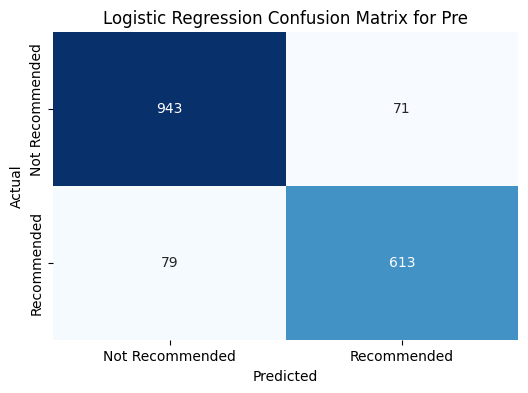

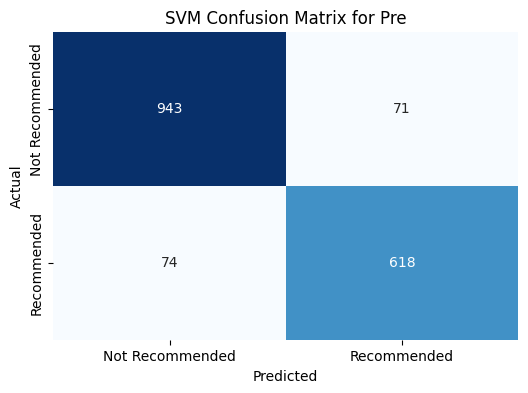

Class distribution for Post:
Recommended
0    8249
1    2642
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report for Post:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1650
           1       0.88      0.85      0.87       529

    accuracy                           0.94      2179
   macro avg       0.92      0.91      0.91      2179
weighted avg       0.94      0.94      0.94      2179

SVM Classification Report for Post:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1650
           1       0.91      0.84      0.87       529

    accuracy                           0.94      2179
   macro avg       0.93      0.91      0.92      2179
weighted avg       0.94      0.94      0.94      2179



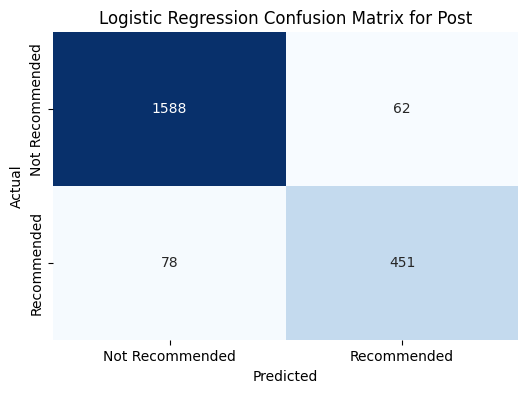

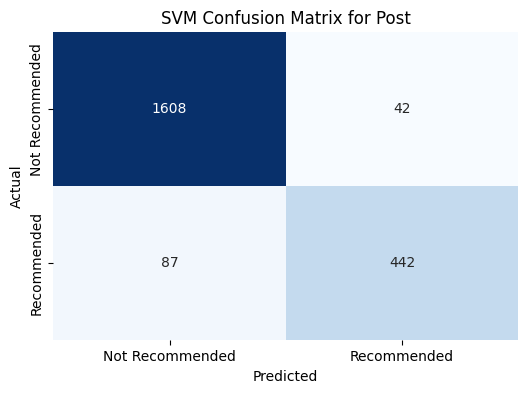

In [24]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Not Recommended', 'Recommended'],
                yticklabels=['Not Recommended', 'Recommended'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Convert 'Recommended' column to numeric
df['Recommended'] = pd.to_numeric(df['Recommended'], errors='coerce')

# Function to split data and train models
def train_models_on_period(df, period):
    # Filter the data by the specified period
    period_df = df[df['Period'] == period]

    # Separate features and labels
    X = period_df['Review_clean']
    y = period_df['Recommended']

    # Check class distribution
    print(f"Class distribution for {period}:")
    print(y.value_counts())

    # Stratified split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Initialize BERT model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    # Function to generate BERT embeddings
    def generate_bert_embeddings(text_data, batch_size=16):
        embeddings = []
        with torch.no_grad():
            for i in range(0, len(text_data), batch_size):
                batch = text_data[i:i + batch_size]
                encoded_input = tokenizer(batch.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')
                input_ids = encoded_input['input_ids'].to(device)
                attention_mask = encoded_input['attention_mask'].to(device)
                outputs = model(input_ids, attention_mask=attention_mask)
                batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
                embeddings.append(batch_embeddings)
        return np.vstack(embeddings)

    # Generate BERT embeddings
    X_train_embeddings = generate_bert_embeddings(X_train)
    X_test_embeddings = generate_bert_embeddings(X_test)

    # Train Logistic Regression
    log_reg_model = LogisticRegression()
    log_reg_model.fit(X_train_embeddings, y_train)
    y_pred_log_reg = log_reg_model.predict(X_test_embeddings)

    print(f"Logistic Regression Classification Report for {period}:")
    print(classification_report(y_test, y_pred_log_reg))

    # Train SVM
    svm_model = SVC(kernel='rbf')
    svm_model.fit(X_train_embeddings, y_train)
    y_pred_svm = svm_model.predict(X_test_embeddings)

    print(f"SVM Classification Report for {period}:")
    print(classification_report(y_test, y_pred_svm))

    return y_test, y_pred_log_reg, y_pred_svm

for period in ['Pre', 'Post']:
    y_test, y_pred_log_reg, y_pred_svm = train_models_on_period(df, period)
    plot_confusion_matrix(y_test, y_pred_log_reg, f"Logistic Regression Confusion Matrix for {period}")
    plot_confusion_matrix(y_test, y_pred_svm, f"SVM Confusion Matrix for {period}")
